
## **pixel-level-segmentation-in-pets-unipr**

@author Matteo Gianvenuti https://github.com/Mqtth3w 
@license GPL-3.0


## Experiment also with in-the-wild samples 
### (meaning images not extracted from the pets dataset: e.g. found online or taken by a smartphone). Does the network perform well over these images?


In [1]:
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image
import sys
import os
sys.path.append(os.path.abspath(".."))
from unet.model import Net as UNet
from deeplabv3_resnet101.model import Net as DeepLabV3

img_unet_transform = transforms.Compose([
    transforms.Resize((256, 256), interpolation=transforms.InterpolationMode.BICUBIC),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
])

img_deeplabv3_transform = transforms.Compose([
    transforms.Resize((512, 512), interpolation=transforms.InterpolationMode.BICUBIC),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
])

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")

def view_pred(images):
    unet = UNet().to(device) # unused args
    deeplabv3 = DeepLabV3().to(device) 
    unet.load_state_dict(torch.load("../unet/checkpoints/OxfordIIITPet_UNet_wd_1e_4.pth", map_location=device))
    deeplabv3.load_state_dict(torch.load("../deeplabv3_resnet101/checkpoints/OxfordIIITPet_DeepLabV3ResNet_lr5e_4.pth", map_location=device))
    unet.eval()
    deeplabv3.eval()

    tot_imgs = len(images)
    figure = plt.figure(figsize=(15, 3 * tot_imgs))
    # not a train
    with torch.no_grad():
        for i, path in enumerate(images):
            img = Image.open(path)
            # unet pred
            img_unet = img_unet_transform(img).unsqueeze(0).to(device) 
            unet_pred = unet(img_unet).argmax(dim=1).squeeze(0).cpu().numpy() # HxW
            # deeplabv3 pred
            img_deeplabv3 = img_deeplabv3_transform(img).unsqueeze(0).to(device)
            deeplabv3_pred = deeplabv3(img_deeplabv3).argmax(dim=1).squeeze(0).cpu().numpy() # HxW
            # plot original image
            ax = figure.add_subplot(tot_imgs, 3, i * 3 + 1)
            ax.imshow(img)
            ax.set_title(f"Image {i+1}")
            ax.axis("off")
            # plot unet prediction
            ax = figure.add_subplot(tot_imgs, 3, i * 3 + 2)
            ax.imshow(unet_pred, cmap="gray")
            ax.set_title(f"UNet pred")
            ax.axis("off")
            # plot deeplabv3 prediction
            ax = figure.add_subplot(tot_imgs, 3, i * 3 + 3)
            ax.imshow(deeplabv3_pred, cmap="gray")
            ax.set_title(f"DeepLabV3 pred")
            ax.axis("off")

    plt.show()


Device: cpu


C:\Users\MATTEO\AppData\Local\Temp\ipykernel_7208\751111794.py:29: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  unet.load_state_dict(torch.load("../unet/checkpoints/OxfordI

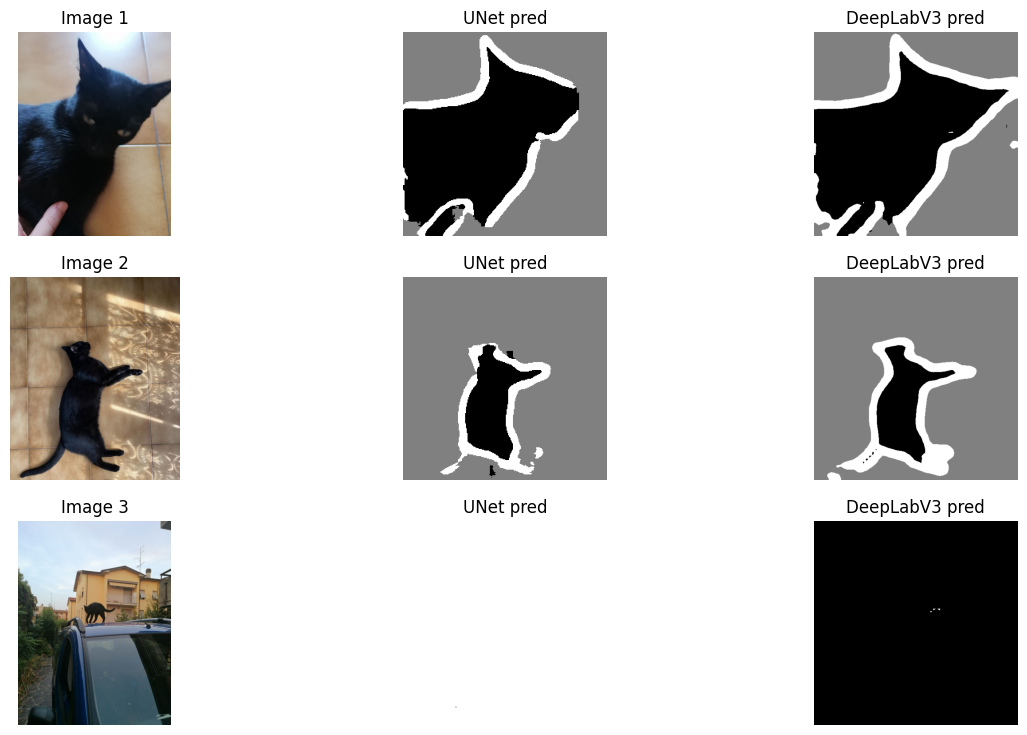

In [2]:
images1 = ['./wild_pet.jpg', './wild_pet2.jpg', './wild_pet_small.jpg']
view_pred(images1)

### That happens if more than on animal is in one image? How does the model perform?

C:\Users\MATTEO\AppData\Local\Temp\ipykernel_7208\751111794.py:29: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  unet.load_state_dict(torch.load("../unet/checkpoints/OxfordI

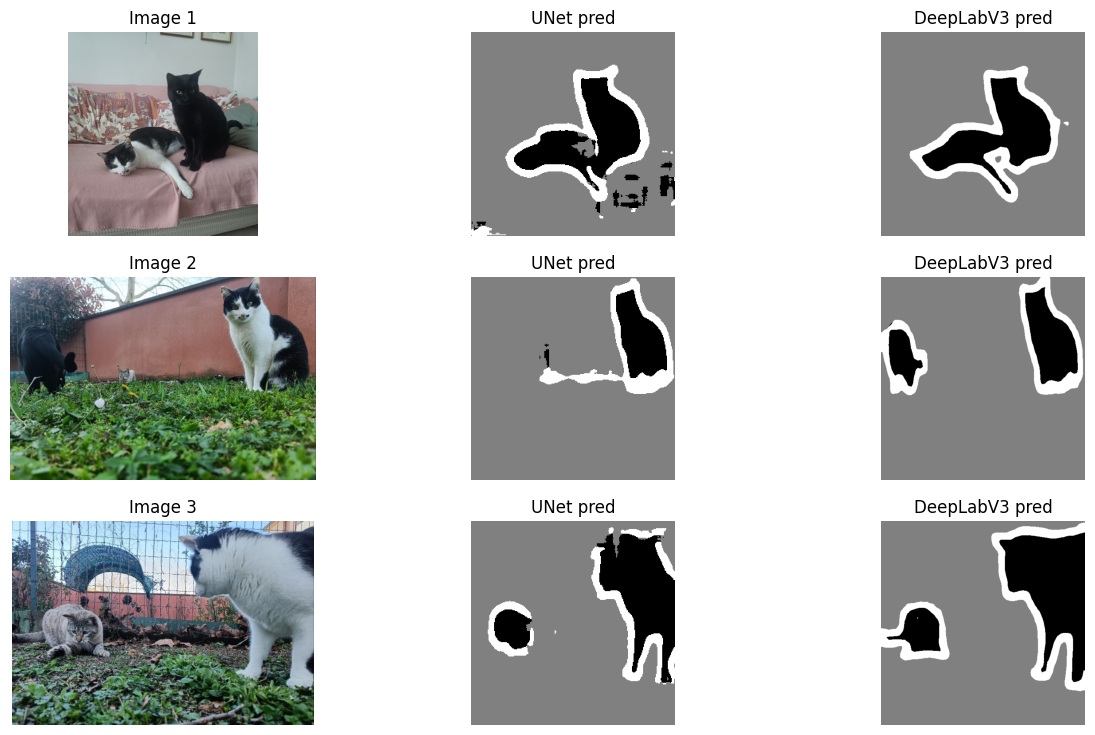

In [3]:

images2 = ['./wild_pets_close.jpg', './wild_pets_far.jpg', './wild_pets_far2.jpg']
view_pred(images2)